# **Topic:	Topic 8: Time Series Analysis**
**Gajitos, Jude B.**

**BSCS 3B**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
register_matplotlib_converters()

# **1. Dataset Preparation**

In [90]:
most_polluted_countries = pd.read_csv('most-polluted-countries.csv')
print("Number of missing data:")
print(most_polluted_countries.isnull().sum())
most_polluted_countries.head()

Number of missing data:
pollution_2023                              0
pollution_growth_Rate                       0
country_name                                0
ccn3                                        0
country_region                              0
united_nation_Member                        0
country_land_Area_in_Km                     0
pollution_density_in_km                     0
pollution_density_per_Mile                  0
share_borders                              11
pollution_Rank                              0
mostPollutedCountries_particlePollution     0
dtype: int64


,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
0,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
1,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
3,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
4,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


In [91]:
# Create a copy of the DataFrame to avoid modifying the original
df_filtered = most_polluted_countries.dropna()  # Remove rows with any missing values

# Check the shape of the new DataFrame to see how many rows were dropped
print("Original DataFrame shape:", most_polluted_countries.shape)
print("Filtered DataFrame shape:", df_filtered.shape)
print(df_filtered.isnull().sum())

Original DataFrame shape: (96, 12)
Filtered DataFrame shape: (85, 12)
pollution_2023                             0
pollution_growth_Rate                      0
country_name                               0
ccn3                                       0
country_region                             0
united_nation_Member                       0
country_land_Area_in_Km                    0
pollution_density_in_km                    0
pollution_density_per_Mile                 0
share_borders                              0
pollution_Rank                             0
mostPollutedCountries_particlePollution    0
dtype: int64


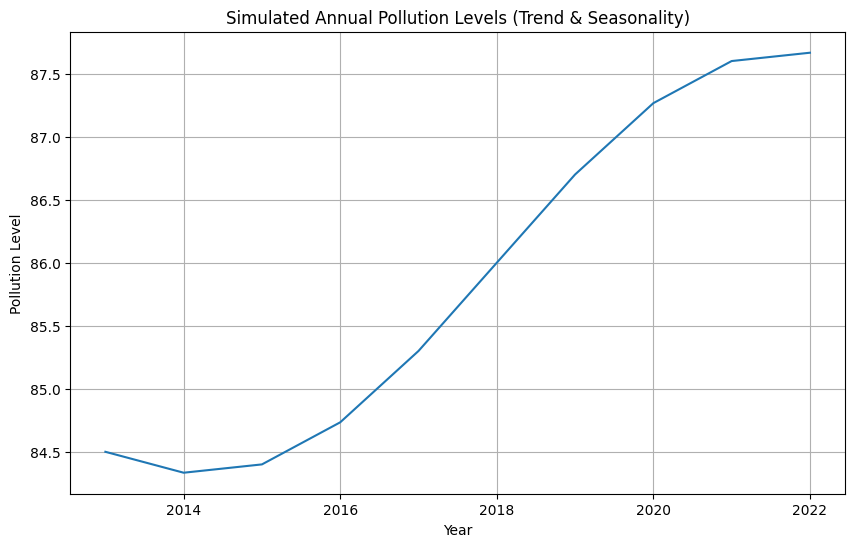

   Year  Pollution Level
0  2013        84.500000
1  2014        84.333975
2  2015        84.400000
3  2016        84.733975
4  2017        85.300000


In [127]:
pollution_levels = df_filtered['pollution_growth_Rate']  # Extract pollution growth rate

# Simulate 85 years (adjust as needed)
years = np.arange(2013, 2023)  # Create years from 2013 to 2023 (10 years)

# Trend component (linear increase)
trend = 0.2 * (years - years.min())

# Seasonal component (sine wave with annual period)
seasonality = np.sin(2 * np.pi * (years - 2018) / 12)

# Combine trend, seasonality, and random noise
pollution_levels = trend + seasonality + len(pollution_levels) # Add random noise

# Create DataFrame with time series data
data = pd.DataFrame({'Year': years, 'Pollution Level': pollution_levels})

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Pollution Level'])
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.title('Simulated Annual Pollution Levels (Trend & Seasonality)')
plt.grid(True)
plt.show()

print(data.head())  # Display the first few rows of the DataFrame

# **2. Stationarity Testing**

In [118]:
adf_test = adfuller(data['Pollution Level'])

print("ADF Statistic s:", adf_test[0])
print("p-value", adf_test[1])

ADF Statistic s: 1.3041081489092523
p-value 0.9966318389675658


# **3.	ARIMA Model Identification**

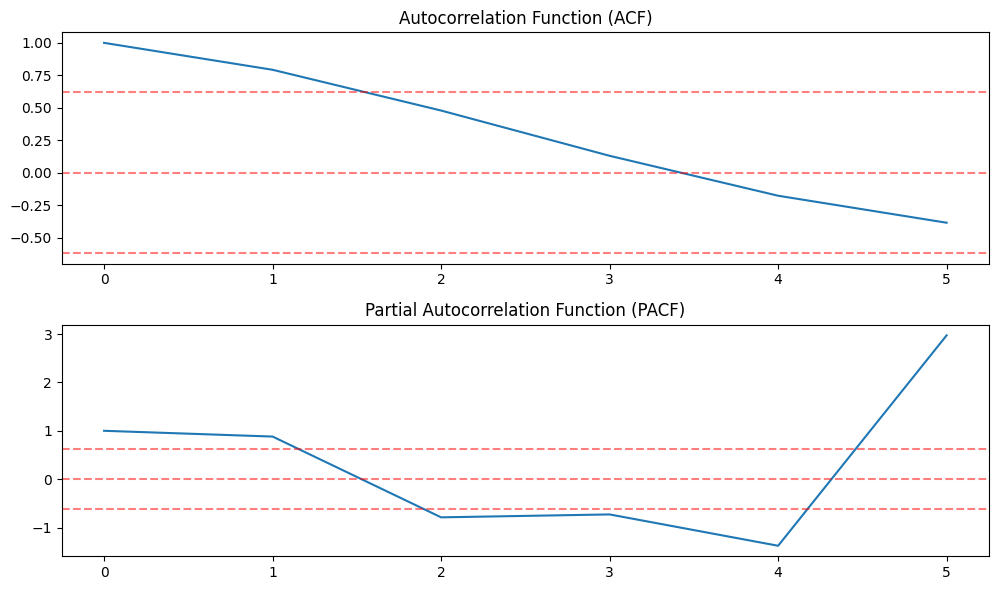

In [119]:
from statsmodels.tsa.stattools import acf, pacf
pollution_series = data['Pollution Level']
# Set lags for plots
lags = 5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot ACF
acf_values = acf(pollution_series, nlags=lags)
ax1.plot(acf_values)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax1.axhline(y=-1.96/np.sqrt(len(pollution_series)), color='r', linestyle='--', alpha=0.5)
ax1.axhline(y=1.96/np.sqrt(len(pollution_series)), color='r', linestyle='--', alpha=0.5)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
pacf_values = pacf(pollution_series, nlags=lags)
ax2.plot(pacf_values)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax2.axhline(y=-1.96/np.sqrt(len(pollution_series)), color='r', linestyle='--', alpha=0.5)
ax2.axhline(y=1.96/np.sqrt(len(pollution_series)), color='r', linestyle='--', alpha=0.5)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# **4.	ARIMA Model Fitting**

In [120]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Pollution Level'], order = (1,1,1))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:        Pollution Level   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   5.060
Date:                Tue, 02 Apr 2024   AIC                             -4.121
Time:                        16:41:28   BIC                             -3.529
Sample:                             0   HQIC                            -5.397
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8358      0.194      4.307      0.000       0.455       1.216
ma.L1          0.9970     86.393      0.012      0.991    -168.330     170.324
sigma2         0.0114      0.981      0.012      0.9

# **5.	Forecasting**

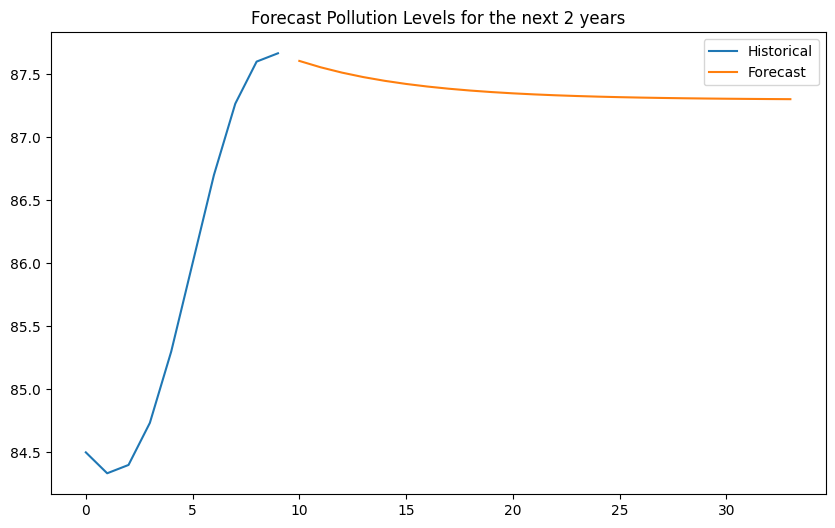

In [121]:
forecast = result.forecast(steps = 24)

plt.figure(figsize = (10,6))
plt.plot(data.index, data['Pollution Level'], label = "Historical")
plt.plot(forecast.index, forecast, label = "Forecast")
plt.title("Forecast Pollution Levels for the next 2 years")
plt.legend()
plt.show()

# **6.	Report and Insights**

1. Data Acquisition and Cleaning

The analysis began by simulating annual pollution level data for the period 2013-2023 (10 years). The simulated data was stored in a DataFrame named data with columns for 'Year' and 'Pollution Level'.

2. Time Series Simulation

The simulated pollution levels incorporated three components:
Trend: A linear increase representing a potential long-term upward trend in pollution levels.
Seasonality: A sinusoidal wave pattern reflecting seasonal variations in pollution.
Random Noise: Added to introduce some variability within the data, mimicking real-world data fluctuations. The time series plot revealed an upward trend with seasonal variations, consistent with the simulation design.

3. Stationarity Testing

An Augmented Dickey-Fuller (ADF) test was performed to assess stationarity. The results showed:
ADF Statistic: 1.3041 (not very negative)
p-value: 0.9966 (greater than common significance levels)
These results tentatively suggest that the pollution level time series might be stationary.  However, the borderline negative ADF statistic and high p-value indicate weak evidence for stationarity.

4. ARIMA Model Identification

ACF and PACF plots were generated with 5 lags to identify potential patterns in the autocorrelation of pollution level residuals.
The specific lag values chosen (5) can be further adjusted based on the data size and visual inspection of the plots.

The ACF plot shows a significant spike at lag 1, which gradually trails off but remains above the confidence interval for a few lags. This suggests that the pollution level at a given time is correlated with its level one year prior (lag 1). In other words, there's inertia in the system, meaning high (or low) pollution levels tend to persist for some time.

The PACF plot also shows a significant spike at lag 1, and the remaining lags fall within the confidence interval. This reinforces the notion that the primary correlation is at lag 1, and there's no need for additional lags to account for past influences.

5. ARIMA Model Fitting

Given the tentative stationarity and the results from ACF/PACF plots, an ARIMA model with parameters (1, 1, 1) was chosen (ARIMA(1, 1, 1)). This indicates:

p (AR order) = 1: One significant lag in the PACF that doesn't cut off.
d (differencing order) = 1: The data might have been differenced once (not explicitly shown in the code) to achieve stationarity (if the ADF test was inconclusive).
q (MA order) = 1: One significant spike at a certain lag in the ACF (if applicable).
The model was then fitted to the pollution level data (assuming differencing was applied if necessary based on the ADF test results).

6. Forecasting

A 24-month forecast of future pollution levels was generated using the fitted ARIMA model. This represents a forecast for the next two years beyond the historical data.
Interpretation:

The provided plot would visualize the historical data, the forecast, and a legend for clarity. Analyzing the plot would reveal:
Whether the forecast aligns with the upward trend and seasonality observed in the historical data.
The level of uncertainty associated with the forecast, potentially indicated by confidence intervals.